# Check energy closure for winter time in Hyytiälä 2018 data

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib widget

In [3]:
data = xr.open_dataset('../results/testrun_fullsoil_profile.nc')

In [12]:
sim_LAI = data.canopy_LAI.max(dim='date').values

In [13]:
sim_LAI

array([0.26923078, 0.53846157, 0.8076923 , 1.0769231 , 1.3461539 ,
       1.6153846 , 1.8846154 , 2.1538463 , 2.4230769 , 2.6923077 ],
      dtype=float32)

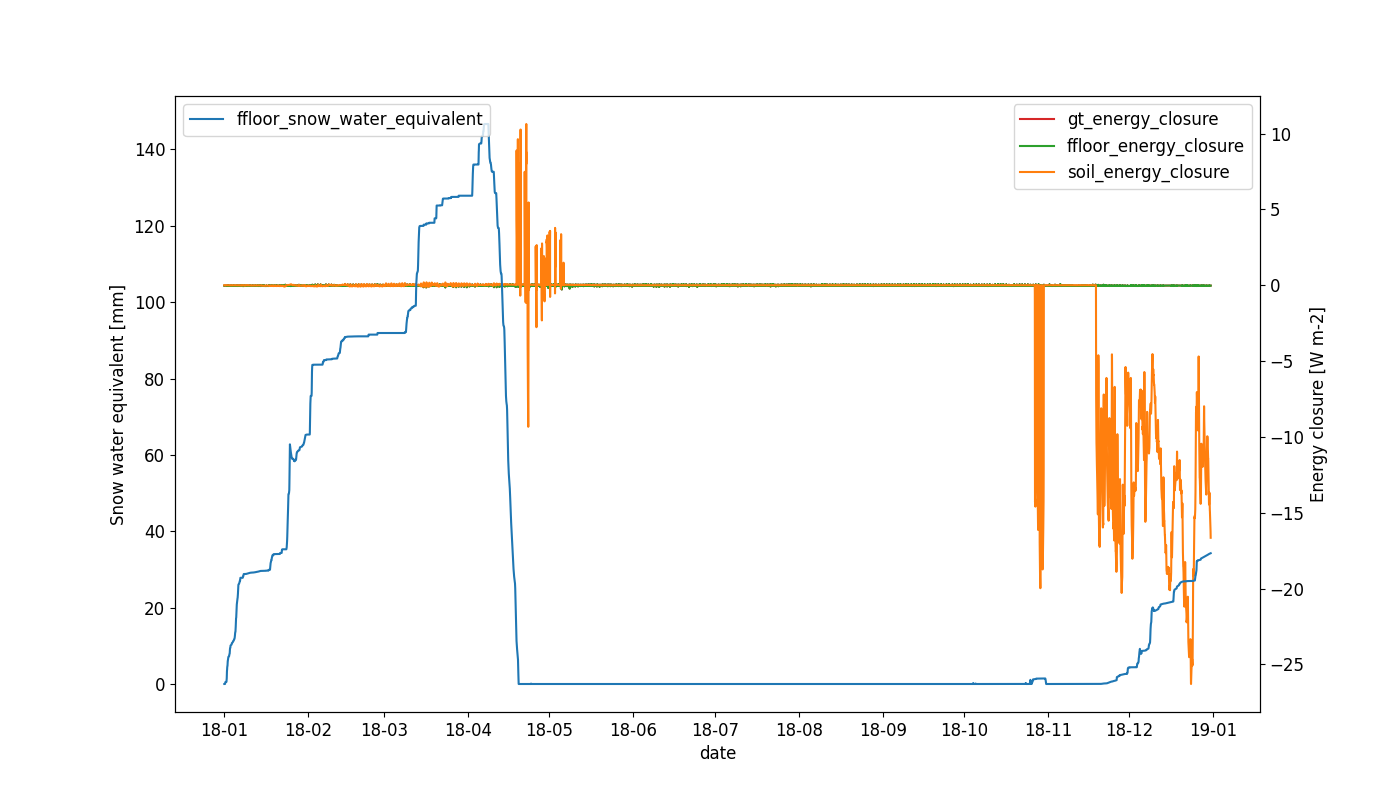

In [6]:
fig, ax = plt.subplots(figsize=(14,8))


ax_right = ax.twinx()
ax.set_zorder(ax_right.get_zorder() + 1)
ax.patch.set_alpha(0)
sim_idx = 3
data['gt_energy_closure'].sel(simulation=sim_idx).plot(ax=ax_right, color='tab:red', zorder=1,label='gt_energy_closure')
data['ffloor_energy_closure'].sel(simulation=sim_idx).plot(ax=ax_right, color='tab:green', zorder=1, label='ffloor_energy_closure')
data['soil_energy_closure'].sel(simulation=sim_idx).plot(ax=ax_right, color='tab:orange', zorder=1, label='soil_energy_closure')

data['ffloor_snow_water_equivalent'].sel(simulation=sim_idx).plot(ax=ax, label='ffloor_snow_water_equivalent')
ax_right.legend()
ax.legend(loc='upper left')
ax_right.set_ylabel('Energy closure [W m-2]')
ax.set_ylabel('Snow water equivalent [mm]')

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))


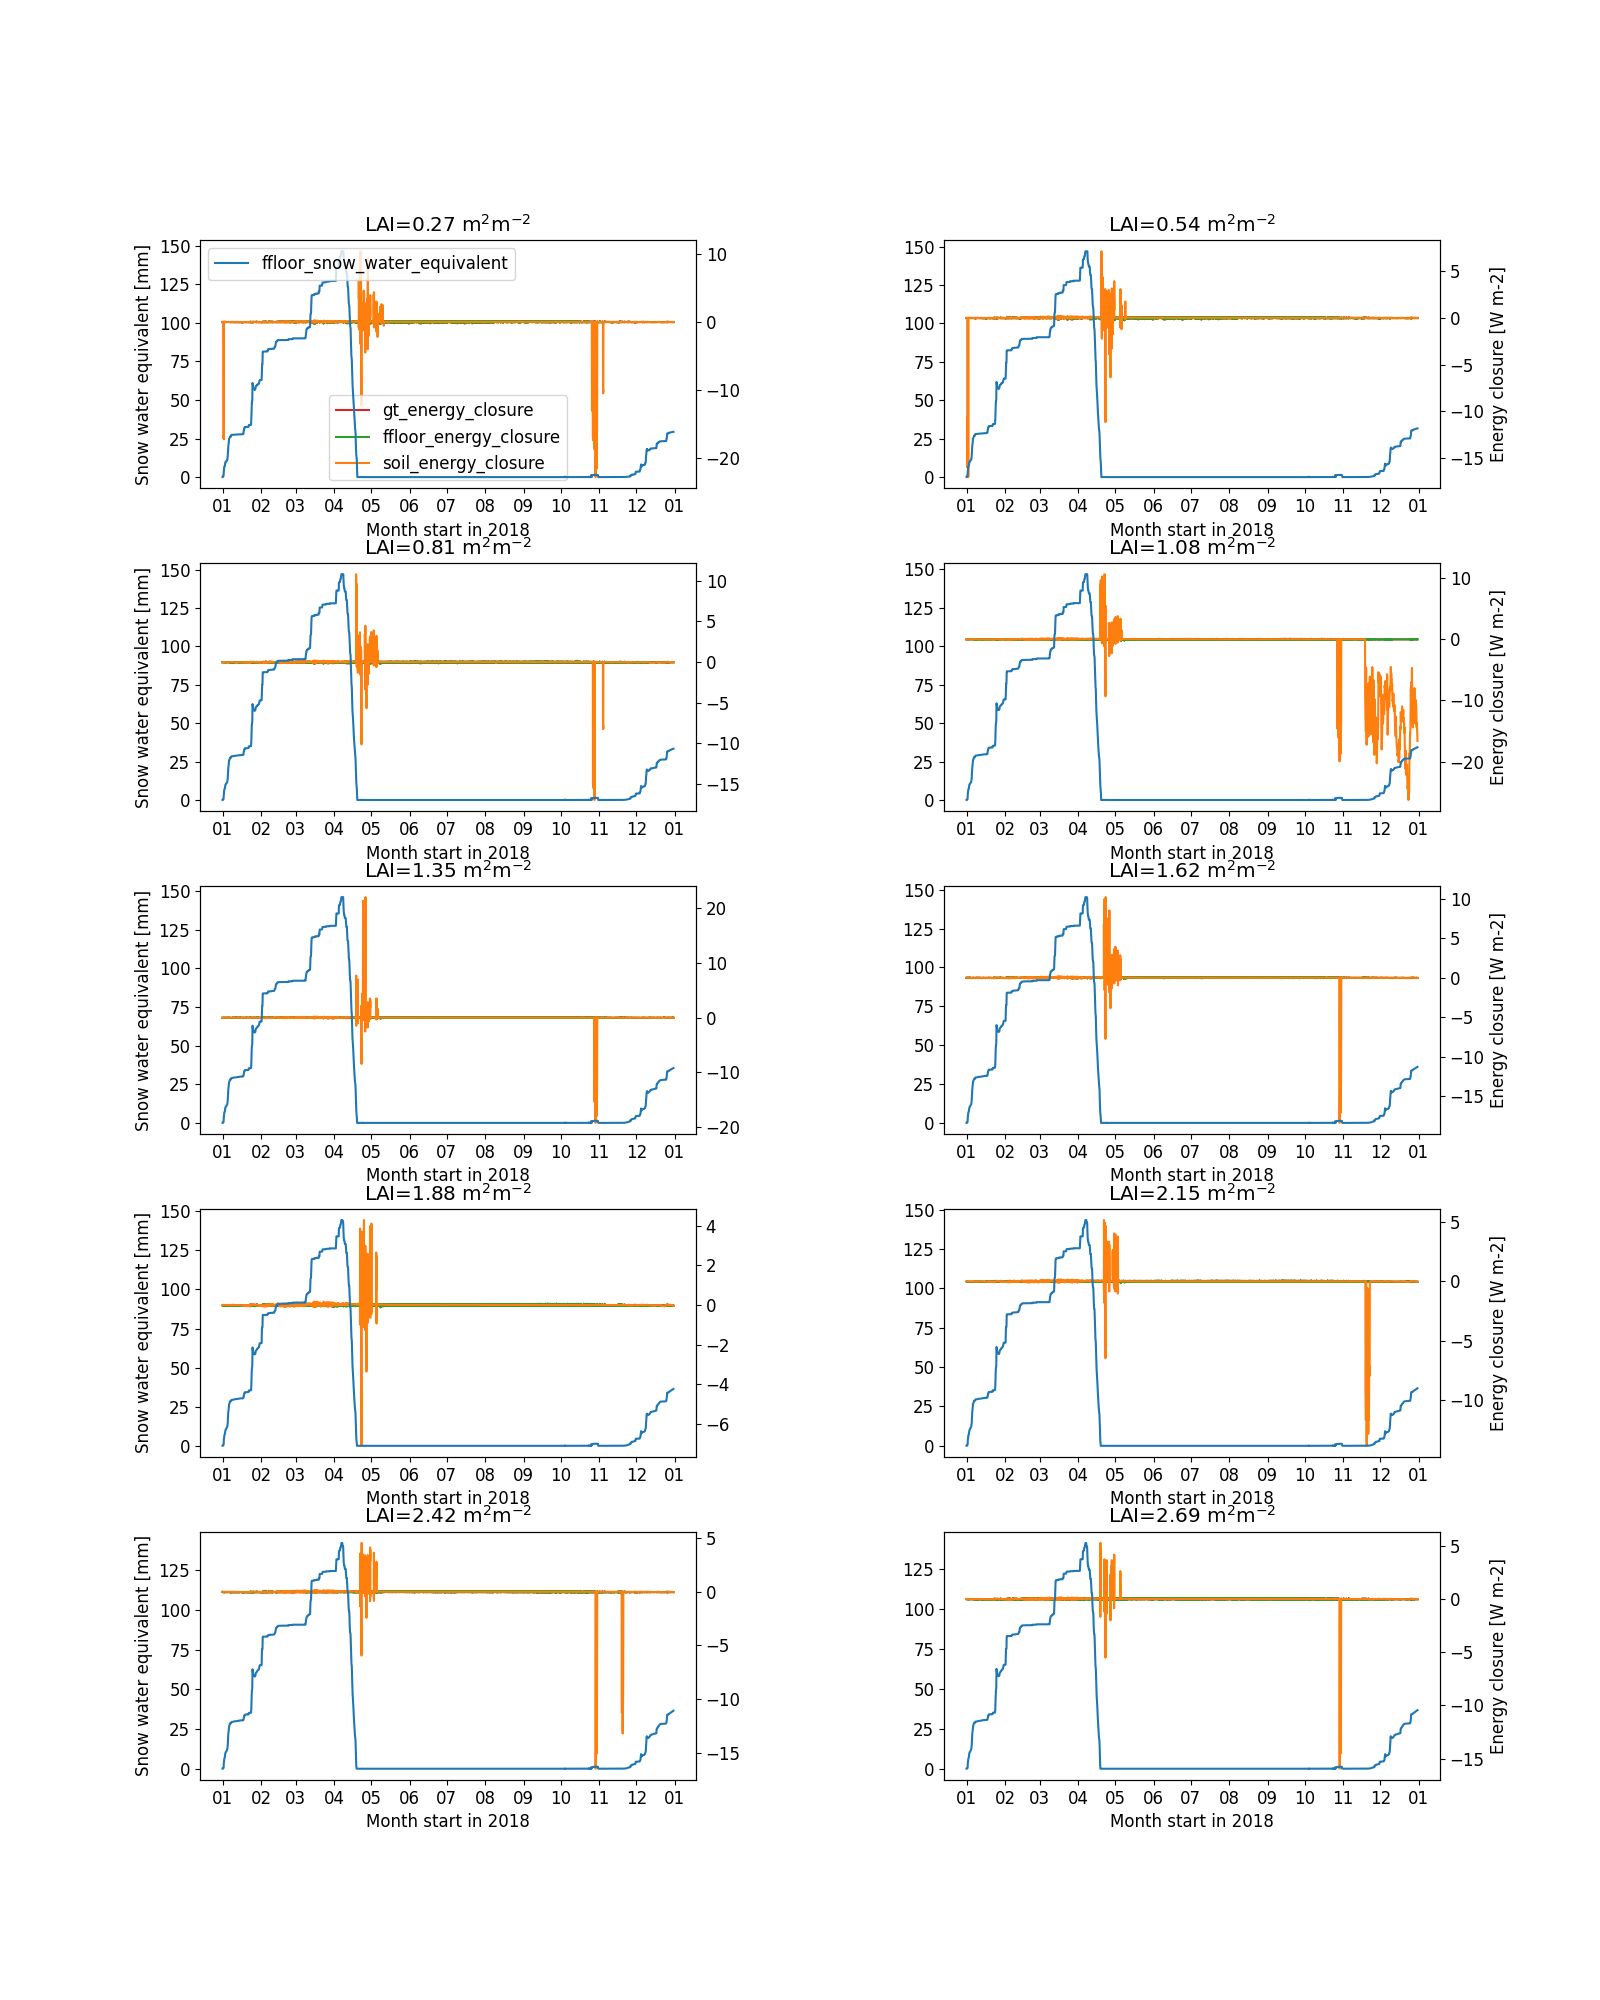

In [28]:
fig, axs = plt.subplots(figsize=(16,20), nrows=5, ncols=2)
axs = axs.flatten()
fig.subplots_adjust(wspace=0.5, hspace=0.3)
for i in range(10):
    sim_idx = i
    ax = axs[i]
    ax_right = ax.twinx()
    ax.set_zorder(ax_right.get_zorder() + 1)
    ax.patch.set_alpha(0)
    data['gt_energy_closure'].sel(simulation=sim_idx).plot(ax=ax_right, color='tab:red', zorder=1,label='gt_energy_closure')
    data['ffloor_energy_closure'].sel(simulation=sim_idx).plot(ax=ax_right, color='tab:green', zorder=1, label='ffloor_energy_closure')
    data['soil_energy_closure'].sel(simulation=sim_idx).plot(ax=ax_right, color='tab:orange', zorder=1, label='soil_energy_closure')

    data['ffloor_snow_water_equivalent'].sel(simulation=sim_idx).plot(ax=ax, label='ffloor_snow_water_equivalent')
    
    if i==0:
        ax.legend(loc='upper left')
        ax_right.legend()
    if i in [1,3,5,7,9]:
        ax_right.set_ylabel('Energy closure [W m-2]')
        ax.set_ylabel('')
    if i in [0,2,4,6,8]:
        ax.set_ylabel('Snow water equivalent [mm]')
        ax_right.set_ylabel('')

    ax.set_xlabel('Month start in 2018')

    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    ax.set_title(f'LAI={np.round(sim_LAI[i],2):.2f} m$^2$m$^{{-2}}$')
